In [11]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## **QUESTION 1**

### MODEL 1

In [12]:
basePath = r"UCI HAR Dataset"

features = pd.read_csv(basePath+"/features.txt", sep="\s+", header=None, names=["index", "feature"])
feature_names = features["feature"].values

X_train_raw = pd.read_csv(basePath+"/train/X_train.txt", sep="\s+", header=None)
y_train_raw = pd.read_csv(basePath+"/train/y_train.txt", sep="\s+", header=None, names=['Activity'])

X_test_raw = pd.read_csv(basePath+"/test/X_test.txt", sep="\s+", header=None)
y_test_raw = pd.read_csv(basePath+"/test/y_test.txt", sep="\s+", header=None, names=['Activity'])

activity_labels = pd.read_csv(basePath+"/activity_labels.txt", sep="\s+", header=None, names=["ActivityID", "ActivityName"])

y_train_raw = y_train_raw.merge(activity_labels, left_on="Activity", right_on="ActivityID").drop(["Activity", "ActivityID"], axis=1)
y_test_raw = y_test_raw.merge(activity_labels, left_on="Activity", right_on="ActivityID").drop(["Activity", "ActivityID"], axis=1)

trim = 0.025
start = int(len(X_train_raw) * trim)
end = len(X_train_raw) - start

X_train = X_train_raw.iloc[start:end].reset_index(drop=True)
y_train = y_train_raw.iloc[start:end].reset_index(drop=True)

In [13]:
model = DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=42)
model.fit(X_train_raw,y_train_raw)

y_pred_raw = model.predict(X_test_raw)

accuracy = accuracy_score(y_test_raw,y_pred_raw)
precision = precision_score(y_test_raw, y_pred_raw, average='weighted')
recall = recall_score(y_test_raw, y_pred_raw, average='weighted')
cm = confusion_matrix(y_test_raw, y_pred_raw)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8622327790973872
Precision: 0.8632726592620287
Recall: 0.8622327790973872


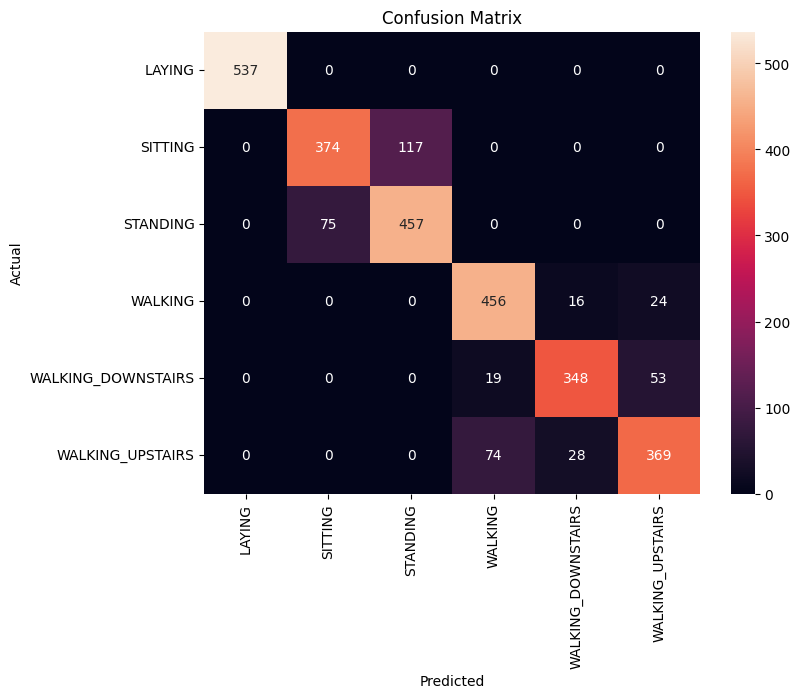

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### MODEL 2

### MODEL 3

In [15]:
basePath = r"Combined\Train"

activities = os.listdir(basePath)

data_list = []
for acitivity in activities:
    folder_path = os.path.join(basePath,acitivity)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path,file)
        df = pd.read_csv(file_path)
        df['activity'] = acitivity
        data_list.append(df)

data = pd.concat(data_list,ignore_index=True)
print(data.head())

X_train_combined = data[['accx','accy','accz']]
y_train_combined = data['activity']
y_train_combined = y_train_combined.astype('category')

       accx      accy      accz activity
0  0.181141  0.787813  0.581194   LAYING
1  0.180389  0.788230  0.584017   LAYING
2  0.184572  0.788880  0.580620   LAYING
3  0.187104  0.788494  0.574279   LAYING
4  0.186461  0.786544  0.570184   LAYING


In [16]:
basePath = r"Combined\Test"

activities = os.listdir(basePath)

data_list = []
for acitivity in activities:
    folder_path = os.path.join(basePath,acitivity)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path,file)
        df = pd.read_csv(file_path)
        df['activity'] = acitivity
        data_list.append(df)

data = pd.concat(data_list,ignore_index=True)
print(data.head())

X_test_combined = data[['accx','accy','accz']]
y_test_combined = data['activity']
y_test_combined = y_test_combined.astype('category')

       accx      accy      accz activity
0  0.088848  0.944508  0.306267   LAYING
1  0.089700  0.981510  0.289673   LAYING
2  0.089773  0.983380  0.291745   LAYING
3  0.073487  0.971434  0.287301   LAYING
4  0.049321  0.952625  0.278895   LAYING


In [17]:
model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
model.fit(X_train_combined,y_train_combined)

y_pred_combined = model.predict(X_test_combined)

accuracy = accuracy_score(y_test_combined, y_pred_combined)
precision = precision_score(y_test_combined, y_pred_combined, average='weighted')
recall = recall_score(y_test_combined, y_pred_combined, average='weighted')
cm = confusion_matrix(y_test_combined, y_pred_combined)

In [18]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5602254411265694
Precision: 0.5944154397040211
Recall: 0.5602254411265694


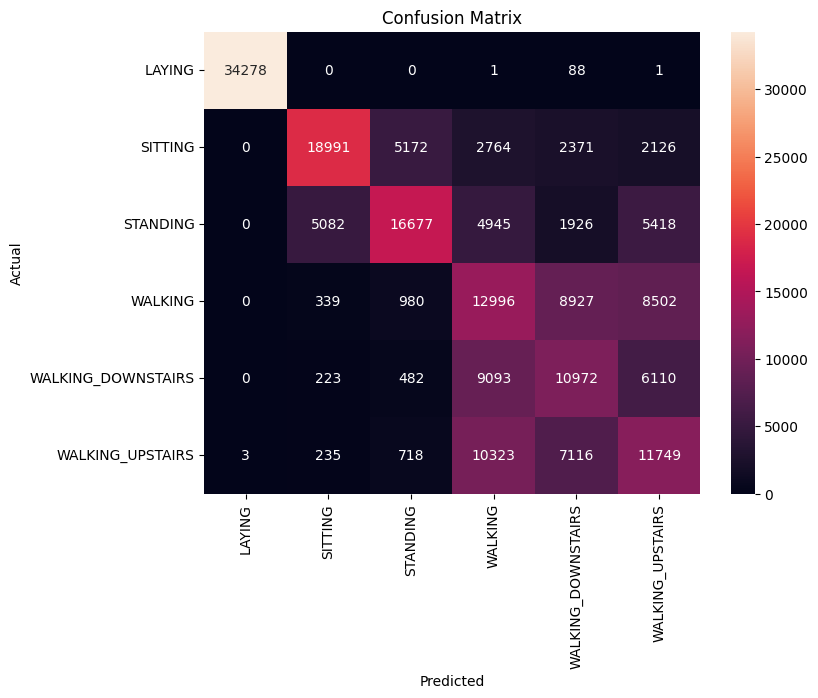

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **QUESTION 2**